# Zomato Data Analysis Project

### Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [2]:
df = pd.read_csv("Zomato data .csv")

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

### convert the data type of column - rate

In [5]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handlerate)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

#### What type of restaurant do the majority of customers order from?

In [8]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

Majority is Dining Category


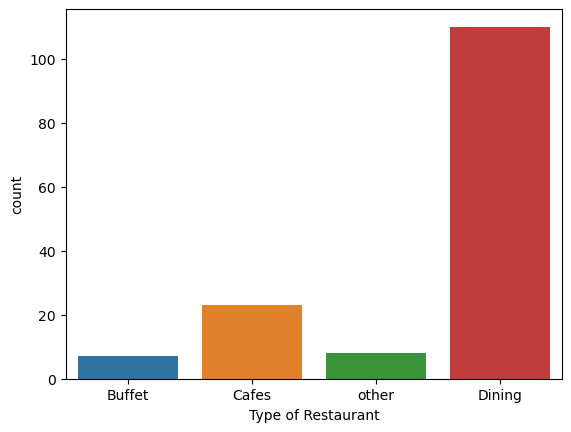

In [9]:
que1 = sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")
que1
print("Majority is Dining Category")

#### How many votes has each type of restaurant received from customers?

Dining has highest votes.


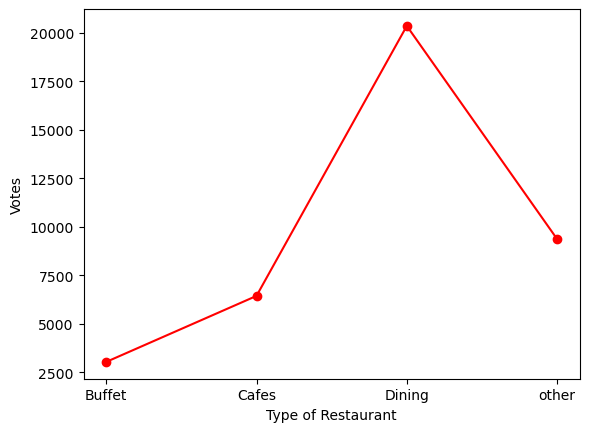

In [10]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="red",marker="o")
plt.xlabel("Type of Restaurant",size=10)
plt.ylabel("Votes")
print("Dining has highest votes.")

#### What are the ratings that the majority of restaurants have received?

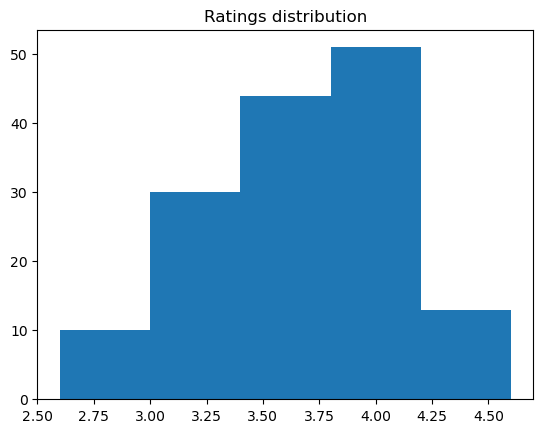

Majority ratings are between 3.5 and 4


In [11]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings distribution")
plt.show()
print("Majority ratings are between 3.5 and 4")

#### Zomato has observed that most couples order most of their food online. What is their average spending on each order?

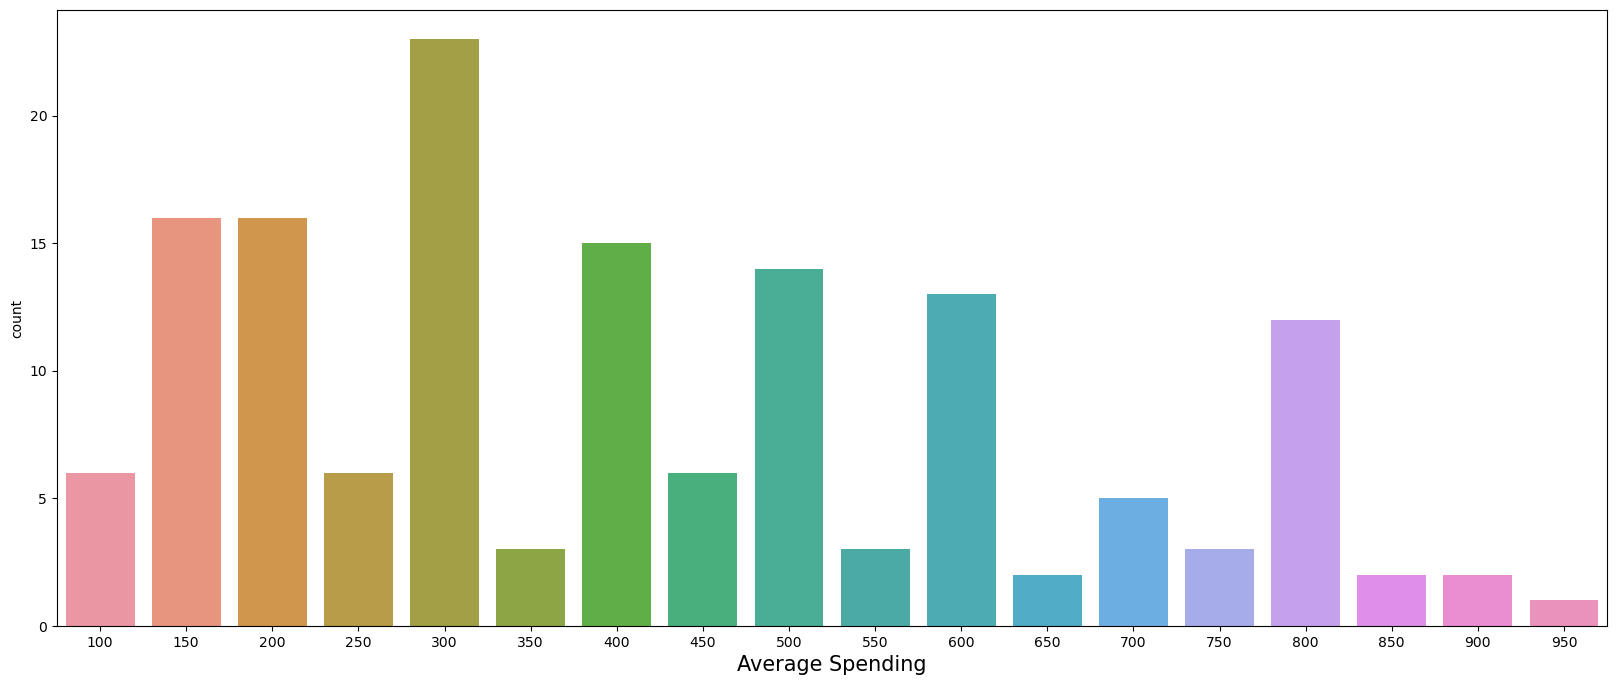

The majority of couples prefer restaurants with an approximately cost of 300 rupees.


In [65]:
x=plt.figure(figure=(20,8))
sns.countplot(x=df['approx_cost(for two people)'])
plt.xlabel("Average Spending" , size=15)
plt.show()
print("The majority of couples prefer restaurants with an approximately cost of 300 rupees.")

#### Which mode(online or offline) has received the maximum rating?

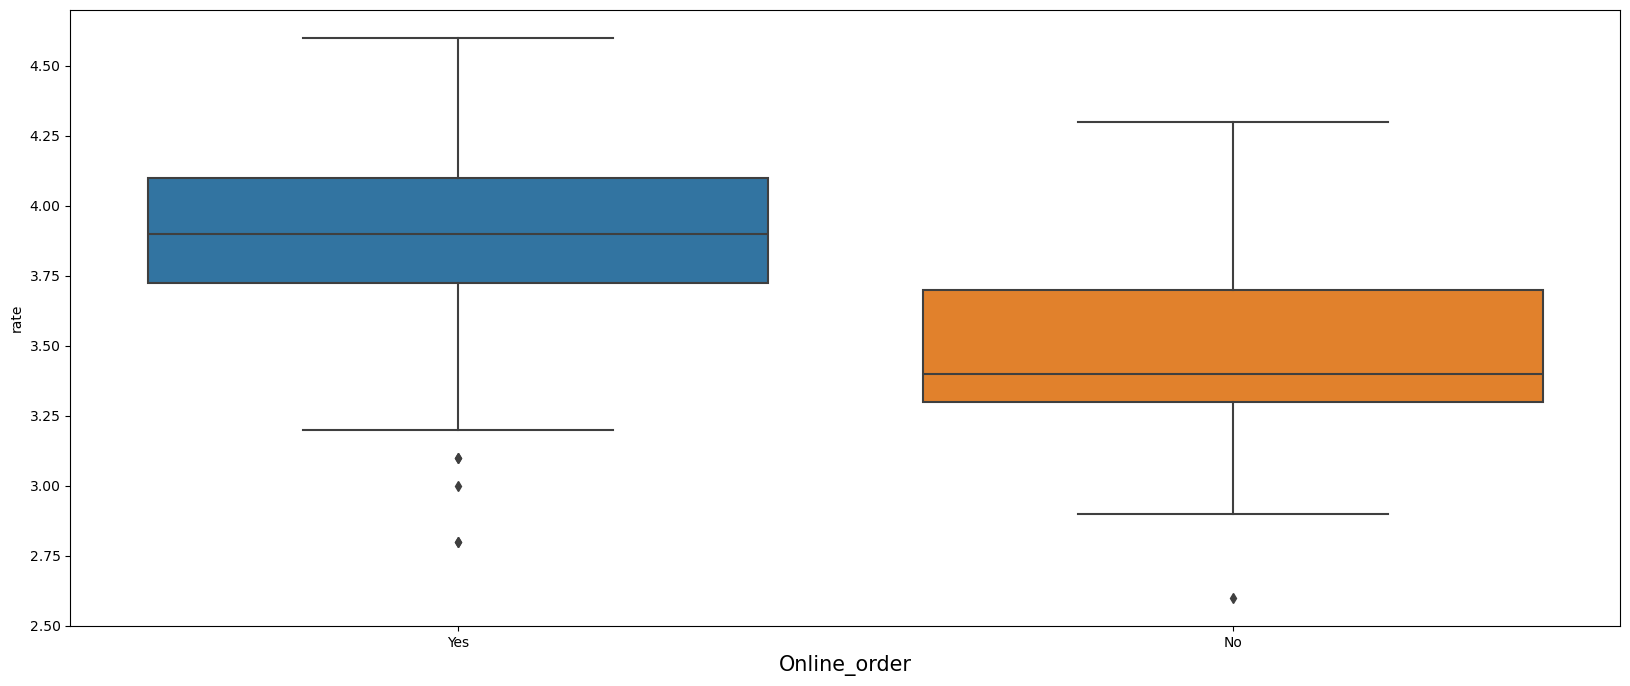

Offline order received lower rating in comparison to online order


In [73]:
y=plt.figure(figure=(20,8))
sns.boxplot(x='online_order',y='rate',data=df)
plt.xlabel("Online_order",size=15)
plt.show()
print("Offline order received lower rating in comparison to online order")

#### Which type of restaurant received more offline orders, so that zomato can provide offers 

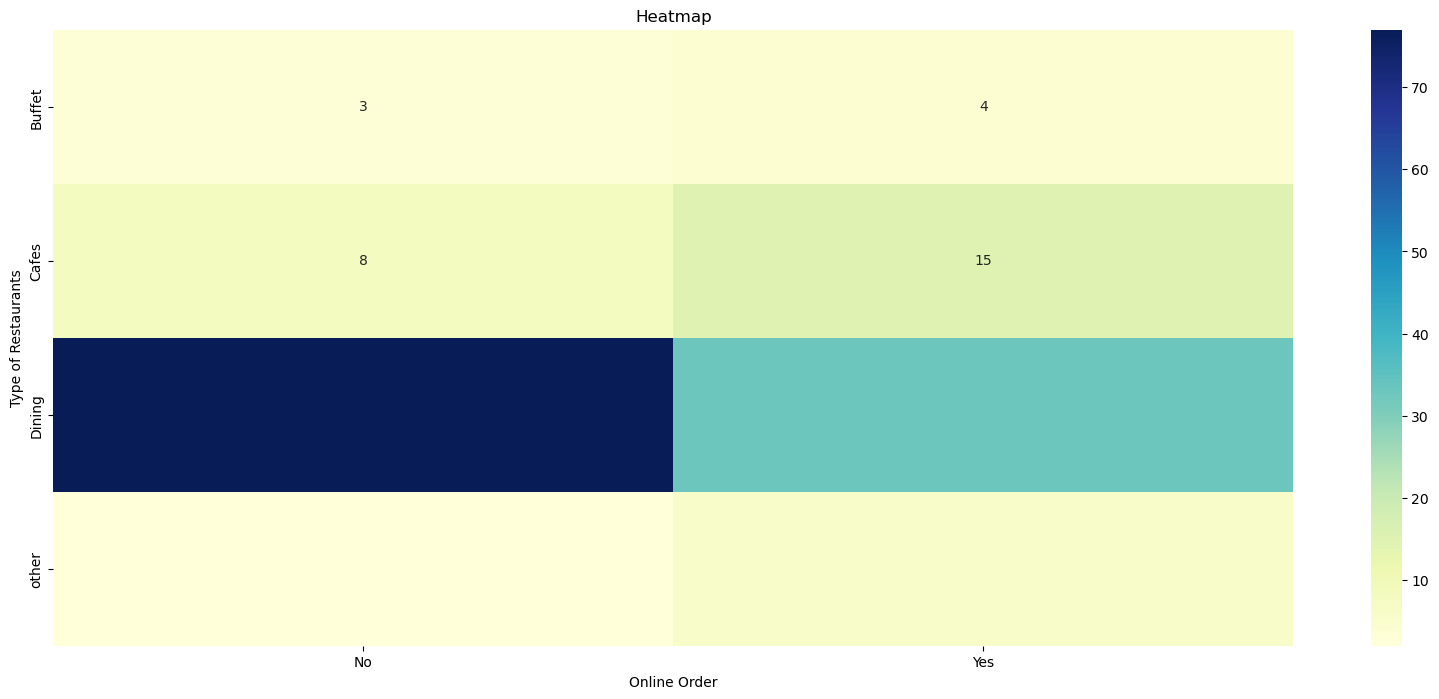

During restaurants primarily accept offline orders, whereas cafes primarily receives online orders. This suggests that clients prefers orders in person at restaurants, but prefer online ordering at cafes.


In [82]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu')
plt.title('Heatmap')
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurants")
plt.show()
print("During restaurants primarily accept offline orders, whereas cafes primarily receives online orders. This suggests that clients prefers orders in person at restaurants, but prefer online ordering at cafes.")